<a href="https://colab.research.google.com/github/acesaran/MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 - Introduction

Linear algebra is a field of math that is close to data science and machine learning. It uses matricies to analyze data and form structures that plays a significant role in things such as image compression and data analysis.

# 1.2 - Elements of Linear Algebra

In linear algebra, nearly everything is computed from vectors. Vectors have both a direction and magnitude in whatever space they occupy. In the case of our real world (3 dimensions) there is an x, y, and z value associated with each vector and points into space starting from the origin.
From two vectors, you can find many things such as the dot product, cross product, and even the angle between them.

In [4]:
#In this example, I find the cross product of vectors x and z (the vector perpindicular to them), and the angle between v and w using the dot product (in radians).
import numpy as np
from numpy import arccos, dot
from numpy.linalg import norm
x = np.array([[5, 3, 2]])
z = np.array([[7, 4, 8]])
print(np.cross(x, z))

v = np.array([[-1, 4, -5]])
w = np.array([[10, 6, 2]])
theta = \
    arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta)

[[ 16 -26  -1]]
[[1.51860859]]


Using vectors we can end up forming matricies, which have both a width and height, formed as a 2D array in coding. Using matricies we can do a wide variety of things such as factorize the matrix, use it to solve linear equations, decompose the matrix using a varity of methods, find the projections of the matrix, and find the eigenvalues and eigenvectors of the matrix.  

In [6]:
#In this example, I chose to find the inverse of the matrix M (a 4x4), and the determinant of the matrix P (a 3x3).
from numpy.linalg import inv, det

M = np.array([[0,2,1,3], 
             [3,2,10,1], 
             [1,0,0,5],
             [0,7,2,1]])
print('Inv M:\n', inv(M))
P = np.array([[0,1,2],
              [6,0,0],
              [1,8,1]])
print('det(p):\n', det(P))

Inv M:
 [[-1.48648649  0.06756757  0.7972973   0.40540541]
 [-0.17117117 -0.02252252  0.06756757  0.1981982 ]
 [ 0.45045045  0.08558559 -0.25675676 -0.15315315]
 [ 0.2972973  -0.01351351  0.04054054 -0.08108108]]
det(p):
 90.0


In [8]:
#In this example, I chose to find the eigen values and vectors of matrix x 
from numpy.linalg import eig
x = np.array([ [2, -2], [1, 14] ])
w,v = eig(x)
print('E-value:', w)
print('E-vector', v)

E-value: [ 2.16904811 13.83095189]
E-vector [[-0.99644687  0.16668321]
 [ 0.08422373 -0.9860105 ]]


# 1.3 - Linear Regression

Linear regression is a form of modeling done using parameters that are konwn and relating them to find unknown parameteres. This is most useful in statistical models to determine where a graph may go eventually past the data that was found. 

In [10]:
#For this example, I use QR Decomposition to decompose a matrix using the Graham-Schmidt process. This is normally used to solve the linear least squares problem.

import numpy as np
from numpy.linalg import qr
x = np.array([[0, 4], [4, 6]])

Q,R = qr(x)
print('Q:', Q)
print('R:', R)

z = np.dot(Q, R)
print('QR:', z)

iterations = [1, 20]
for i in range(20):
    Q,R = qr(x)
    x = np.dot(R, Q)
    if i+1 in iterations:
        print(f'Iteration {i+1}:')
        print(x)

Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-4. -6.]
 [ 0. -4.]]
QR: [[0. 4.]
 [4. 6.]]
Iteration 1:
[[6. 4.]
 [4. 0.]]
Iteration 20:
[[ 8.0000000e+00  1.8189685e-11]
 [ 1.8189894e-11 -2.0000000e+00]]


[[2.42704165]
 [1.01670214]]


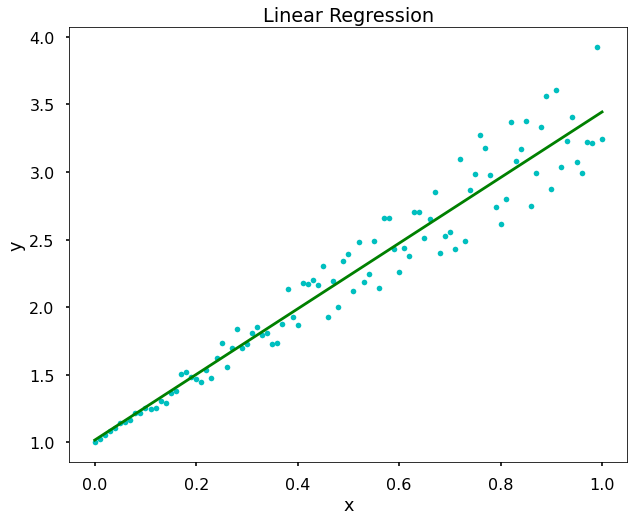

In [21]:
#For this last example, I generate a random number of dots along a semi-constricted path and use direct least square regression. After this, I model a line best fit to those points.
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = np.linspace(0, 1, 101)
y = 1 + 2*x + x * np.random.random(len(x))
A = np.vstack([x, np.ones(len(x))]).T

y = y[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'c.')
plt.plot(x, alpha[0]*x + alpha[1], 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression")
plt.show()